In [1]:
import $ivy.`org.apache.spark::spark-sql:2.4.3`


import org.apache.spark.sql._
import org.apache.spark.sql.functions._


//Reducir numero logs
import org.apache.log4j.{Level, Logger}
Logger.getLogger("org").setLevel(Level.OFF)


//For adding extra dependenies
import $ivy.`org.typelevel::cats-core:1.6.0`

//Plotly
import $ivy.`org.plotly-scala::plotly-almond:0.7.1`
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._

import $ivy.$                                  



import org.apache.spark.sql._

import org.apache.spark.sql.functions._


//Reducir numero logs

import org.apache.log4j.{Level, Logger}

import $ivy.$                               

//Plotly

import $ivy.$                                      

import plotly._, plotly.element._, plotly.layout._, plotly.Almond._

### Inicio Spark Session y Algunos métodos para descargar los datos

In [2]:
//Iniciamos session de Spark
val spark = {
  NotebookSparkSession.builder()
    .appName("AnalisisMercadoEnergia")
    .master("local[*]")
    .getOrCreate()
}
import spark.implicits._

Loading spark-stubs
Getting spark JARs
Creating SparkSession


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties


Spark UI

spark: SparkSession = org.apache.spark.sql.SparkSession@c9dc1e5
import spark.implicits._

# Carga de datos
Datos diarios del balance electrico a nivel nacional

In [3]:
val filePath = "../../data/parquet/dsMercadoNacionalTotal.parquet"

val dataFrameMercados: DataFrame = spark.read
  //.option("header", "true") // Si el archivo tiene un encabezado
  //.option("inferSchema", "true") // Para inferir automáticamente el esquema
  //.csv(filePath)
    .parquet(filePath)

val dfMercados = dataFrameMercados.orderBy("Fecha")

parquet at cmd2.sc:7

1 / 1

filePath: String = "../../data/parquet/dsMercadoNacionalTotalPrueba.parquet"
dataFrameMercados: DataFrame = [Fecha: timestamp, Valor_Mercado_Spot: double ... 3 more fields]
dfMercados: Dataset[Row] = [Fecha: timestamp, Valor_Mercado_Spot: double ... 3 more fields]

In [4]:
dfMercados.show()

show at cmd3.sc:1

15 / 15

+-------------------+------------------+-----------------------+----------+---------------+
|              Fecha|Valor_Mercado_Spot|Porcentaje_Mercado_Spot|PVPC_Valor|PVPC_Porcentaje|
+-------------------+------------------+-----------------------+----------+---------------+
|2013-12-31 23:00:00|             20.02|                    1.0|      null|           null|
|2014-01-01 00:00:00|             10.34|                    1.0|      null|           null|
|2014-01-01 01:00:00|              5.35|                    1.0|      null|           null|
|2014-01-01 02:00:00|               5.0|                    1.0|      null|           null|
|2014-01-01 03:00:00|               0.5|                    1.0|      null|           null|
|2014-01-01 04:00:00|               0.0|                    0.0|      null|           null|
|2014-01-01 05:00:00|               0.0|                    0.0|      null|           null|
|2014-01-01 06:00:00|               0.0|                    0.0|      null|     

#### Consulta Precio - Energia Renovable - Energia no Renovable - Saldo

### Precio histórico Anual
Analizamos como ha variado el precio de la energía medio año por año.

In [ ]:
def precioHistoricoAnual = {
    val dfPromedioAnual = dfMercados
        .filter(date_format(col("Fecha"), "yyyy") =!= 2013)
        .groupBy(date_format(col("Fecha"), "yyyy").as("Año"))
        .agg(avg("Valor_Mercado_Spot").as("ValorPromedioAño"))
        .orderBy(col("Año"))

    val seqPrecioEnergia = dfPromedioAnual.select("ValorPromedioAño").as[Double].collect.toSeq
    val seqAños = dfPromedioAnual.select("Año").as[String].collect.toSeq

    val trace =  Scatter(seqAños, seqPrecioEnergia, name = "€/MWh")

    val data = Seq(trace)
    plot(data)
}

precioHistoricoAnual

collect at cmd7.sc:8

15 / 15

collect at cmd7.sc:8

15 / 15

collect at cmd7.sc:8

200 / 200

collect at cmd7.sc:8 
 (kill)

98 + 16 / 200

collect at cmd5.sc:8

15 / 15

collect at cmd5.sc:8

15 / 15

collect at cmd5.sc:8

200 / 200

collect at cmd5.sc:8

200 / 200

collect at cmd5.sc:8

200 / 200

collect at cmd5.sc:8

24 / 24

collect at cmd5.sc:9

15 / 15

collect at cmd5.sc:9

15 / 15

collect at cmd5.sc:9

200 / 200

collect at cmd5.sc:9

200 / 200

collect at cmd5.sc:9

200 / 200

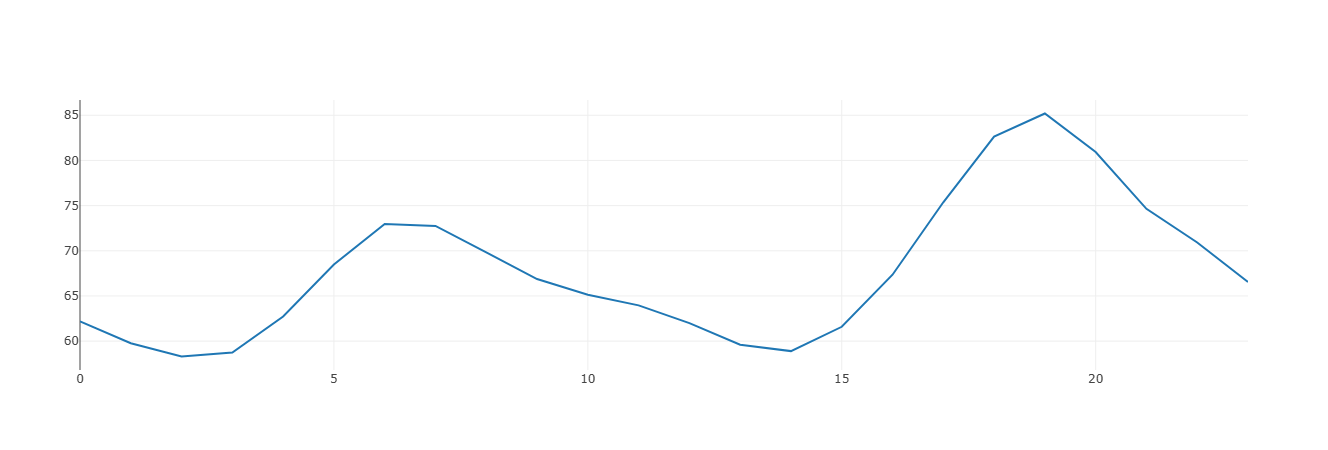

defined function precioHistoricoPromedioPorHora
res5_1: String = "plot-1aed7cbc-2482-4d73-9c6d-79b7a1decacd"

In [6]:
def precioHistoricoPromedioPorHora = {
    val df = dfMercados
        .select("Valor_Mercado_Spot", "Fecha")
        .groupBy(date_format(col("Fecha"), "HH").as("Hora"))
        .agg(avg("Valor_Mercado_Spot").as("PromedioPorHora"))
        .orderBy(col("Hora"))

    val seqPrecioEnergia = df.select("PromedioPorHora").as[Double].collect.toSeq
    val seqAños = df.select("Hora").as[String].collect.toSeq

    val trace =  Scatter(seqAños, seqPrecioEnergia, name = "€/MWh")
     
    val data = Seq(trace)
    plot(data)
}
precioHistoricoPromedioPorHora

collect at cmd6.sc:8

15 / 15

collect at cmd6.sc:8

15 / 15

collect at cmd6.sc:8

200 / 200

collect at cmd6.sc:8

200 / 200

collect at cmd6.sc:8

200 / 200

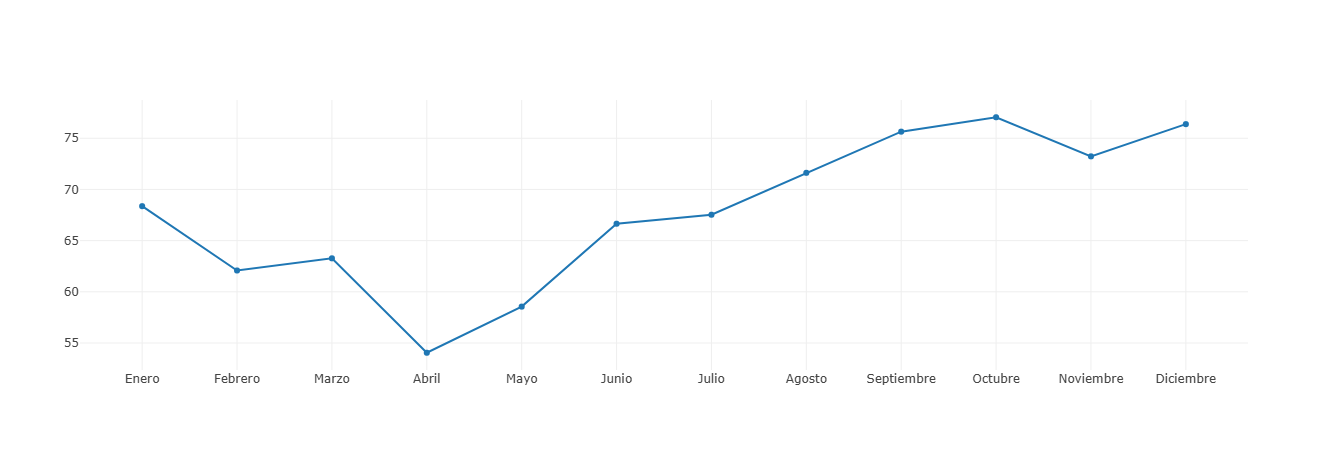

defined function precioHistoricoPromedioMensual
res6_1: String = "plot-85195029-de02-4f21-9ed6-c8e5312c1af8"

In [7]:
def precioHistoricoPromedioMensual = {
val df = dfMercados
    .select("Valor_Mercado_Spot", "Fecha")
    .groupBy(date_format(col("Fecha"), "MM").as("Mes"))
    .agg(avg("Valor_Mercado_Spot").as("PromedioMensual"))
    .orderBy(col("Mes"))

val seqPrecioEnergia = df.select("PromedioMensual").as[Double].collect.toSeq
val seqMeses = Seq("Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre")


val trace =  Scatter(seqMeses, seqPrecioEnergia, name = "€/MWh")
     
val data = Seq(trace)
plot(data)
}

precioHistoricoPromedioMensual

### Cargamos también datos balance para comparar

In [9]:
val filePath = "../../data/parquet/dsBalanceNacional11-24.parquet"

val dataFrameBalance: DataFrame = spark.read
  //.option("header", "true") // Si el archivo tiene un encabezado
  //.option("inferSchema", "true") // Para inferir automáticamente el esquema
  //.csv(filePath)
    .parquet(filePath)

parquet at cmd8.sc:7

1 / 1

filePath: String = "../../data/parquet/dsBalanceNacional11-24.parquet"
dataFrameBalance: DataFrame = [Familia: string, Tipo: string ... 4 more fields]

In [10]:
dataFrameBalance.show()

show at cmd9.sc:1

1 / 1

+---------+----------+-------------------+-------------------+----------+--------------+
|  Familia|      Tipo|      FechaCompleta|         Porcentaje|     Valor|BajasEmisiones|
+---------+----------+-------------------+-------------------+----------+--------------+
|Renovable|Hidráulica|2013-12-31 23:00:00| 0.2070493282098544| 73065.052|          true|
|Renovable|Hidráulica|2014-01-01 23:00:00|0.23631205453294465| 89171.545|          true|
|Renovable|Hidráulica|2014-01-02 23:00:00| 0.2735980903206654|102502.527|          true|
|Renovable|Hidráulica|2014-01-03 23:00:00|0.24018151631870316|106840.706|          true|
|Renovable|Hidráulica|2014-01-04 23:00:00|0.28984651129433686|117217.635|          true|
|Renovable|Hidráulica|2014-01-05 23:00:00| 0.3229806730258387|110841.694|          true|
|Renovable|Hidráulica|2014-01-06 23:00:00|0.40968176867979184| 137057.77|          true|
|Renovable|Hidráulica|2014-01-07 23:00:00| 0.4030920409555886|140921.275|          true|
|Renovable|Hidráulica

### Comparación precios de Energía y generación renovable durante el año

collect at cmd7.sc:15

15 / 15

collect at cmd7.sc:15

15 / 15

collect at cmd7.sc:15

200 / 200

collect at cmd7.sc:15

200 / 200

collect at cmd7.sc:15

200 / 200

collect at cmd7.sc:15

12 / 12

collect at cmd7.sc:16

3 / 3

collect at cmd7.sc:16

200 / 200

collect at cmd7.sc:16

200 / 200

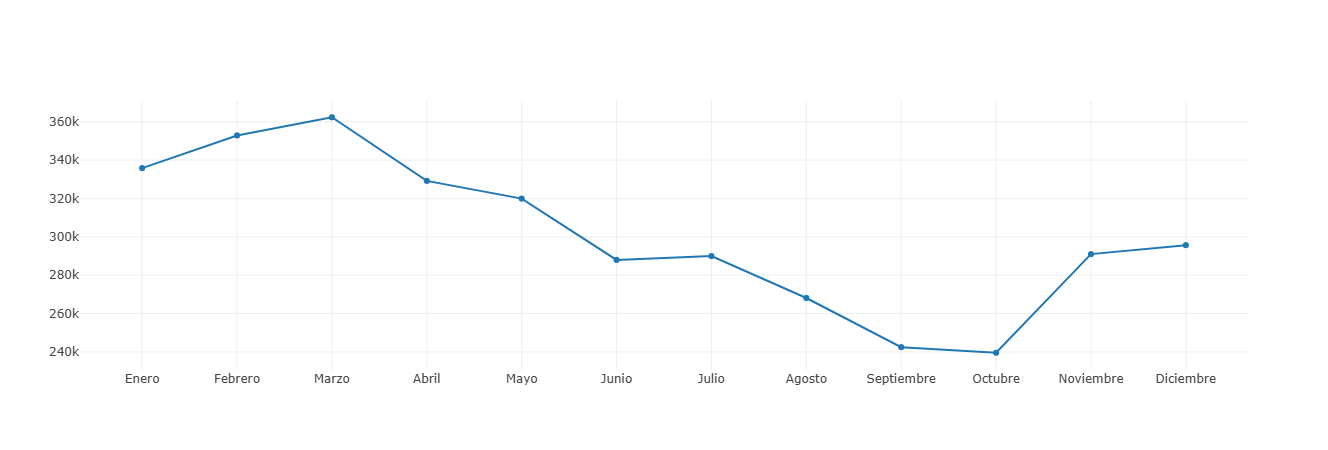

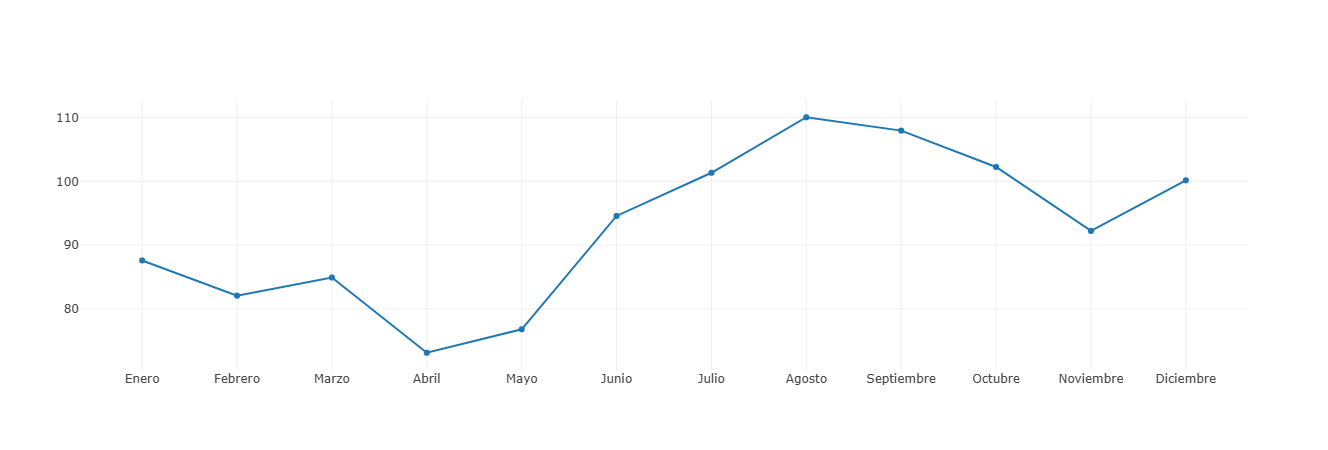

defined function precioMensualYGeneracionRenovable
res7_1: String = "plot-23e0a340-3d35-48b6-9993-ededce425eee"

In [8]:
def precioMensualYGeneracionRenovable() = {
    
    val df = dfMercados
    .groupBy(date_format(col("Fecha"), "MM").as("Mes"))
    .agg(avg("Valor_Mercado_Spot").as("PromedioMensual"))
    .orderBy(col("Mes"))

    val dfRenovables = dataFrameBalance
        .filter(year(col("FechaCompleta")) > 2013)
        .filter($"Tipo" === "Generación renovable")
        .groupBy(month(col("FechaCompleta")).as("Mes"))
        .agg(avg("Valor").as("PromedioMensual"))
        .orderBy(col("Mes"))
    
    val seqPrecioEnergia = df.select("PromedioMensual").as[Double].collect.toSeq
    val seqGeneracionRenovable = dfRenovables.select("PromedioMensual").as[Double].collect.toSeq
    val seqMeses = Seq("Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre")

    
    //val tracePrecios = Scatter(seqMeses, seqPrecioEnergia, name = "€/MWh")
    val traceMercados =  Scatter(seqMeses, seqPrecioEnergia, name = "€/MWh")
    val traceRenovables = Scatter(seqMeses, seqGeneracionRenovable, name = "Renovables")

    val data1 = Seq(traceRenovables)
    val data2 = Seq(traceMercados)
    plot(data1)
    plot(data2)

}

// Llamar a la función
precioMensualYGeneracionRenovable()

In [9]:
dfMercados.orderBy(asc("Valor_Mercado_Spot")).show()

show at cmd8.sc:1

15 / 15

+-------------------+------------------+-----------------------+----------+---------------+
|              Fecha|Valor_Mercado_Spot|Porcentaje_Mercado_Spot|Valor_PVPC|Porcentaje_PVPC|
+-------------------+------------------+-----------------------+----------+---------------+
|2014-02-05 05:00:00|               0.0|                    0.0|      null|           null|
|2014-02-10 06:00:00|               0.0|                    0.0|      null|           null|
|2014-02-14 01:00:00|               0.0|                    0.0|      null|           null|
|2014-02-05 03:00:00|               0.0|                    0.0|      null|           null|
|2014-02-13 00:00:00|               0.0|                    0.0|      null|           null|
|2014-02-05 04:00:00|               0.0|                    0.0|      null|           null|
|2014-02-09 23:00:00|               0.0|                    0.0|      null|           null|
|2014-02-10 00:00:00|               0.0|                    0.0|      null|     

In [49]:
dataFrameBalance.filter(date_format($"FechaCompleta", "yyyy-MM-dd") === "2024-06-16")
    .filter(!$"Tipo".isin("Generación renovable","Generación no renovable"))
    //.filter(!$"Familia".isin("Demanda"))
    //.agg(sum("Valor").as("ValorTotal"))
    .orderBy(desc("Valor"))
    .show()

show at cmd48.sc:5

3 / 3

+------------+--------------------+-------------------+--------------------+----------+-------------------+--------+--------------+
|     Familia|                Tipo|      FechaCompleta|          Porcentaje|     Valor|                Dia|    Hora|BajasEmisiones|
+------------+--------------------+-------------------+--------------------+----------+-------------------+--------+--------------+
|     Demanda|     Demanda en b.c.|2024-06-16 22:00:00|                 1.0|676781.672|2024-06-16 00:00:00|22:00:00|         false|
|   Renovable|  Solar fotovoltaica|2024-06-16 22:00:00|   0.442924119800872|199722.726|2024-06-16 00:00:00|22:00:00|          true|
|No-Renovable|             Nuclear|2024-06-16 22:00:00|  0.5294125255992977|163159.826|2024-06-16 00:00:00|22:00:00|          true|
|   Renovable|              Eólica|2024-06-16 22:00:00| 0.32009084468813487|144334.917|2024-06-16 00:00:00|22:00:00|          true|
|   Renovable|          Hidráulica|2024-06-16 22:00:00| 0.15304483849479314|

In [41]:
199722.726 / 676781.672 * 100

res40: Double = 29.510658202339734